In [ ]:
# TimeGPT versus other neural methods

In [ ]:
# Tags

In [ ]:
# References
[TimeGPT](https://towardsdatascience.com/timegpt-the-first-foundation-model-for-time-series-forecasting-bf0a75e63b3a)

In [8]:
import os

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.numpy import mae, mse

#from nixtlats import TimeGPT

%matplotlib inline

# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')

In [ ]:
#with open("data/timegpt_api_key.txt", 'r') as file:
#        API_KEY = file.read()

In [9]:
path = os.path.abspath(os.getcwd())
my_file = 'medium_views_published_holidays.csv'
input_path = os.path.join(path, 'data', my_file)

df = pd.read_csv(input_path)
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,unique_id,ds,y,published,is_holiday
0,0,2020-01-01,1131,0.0,1
1,0,2020-01-02,1764,0.0,0
2,0,2020-01-03,1699,0.0,0
3,0,2020-01-04,1322,0.0,0
4,0,2020-01-05,1491,0.0,0


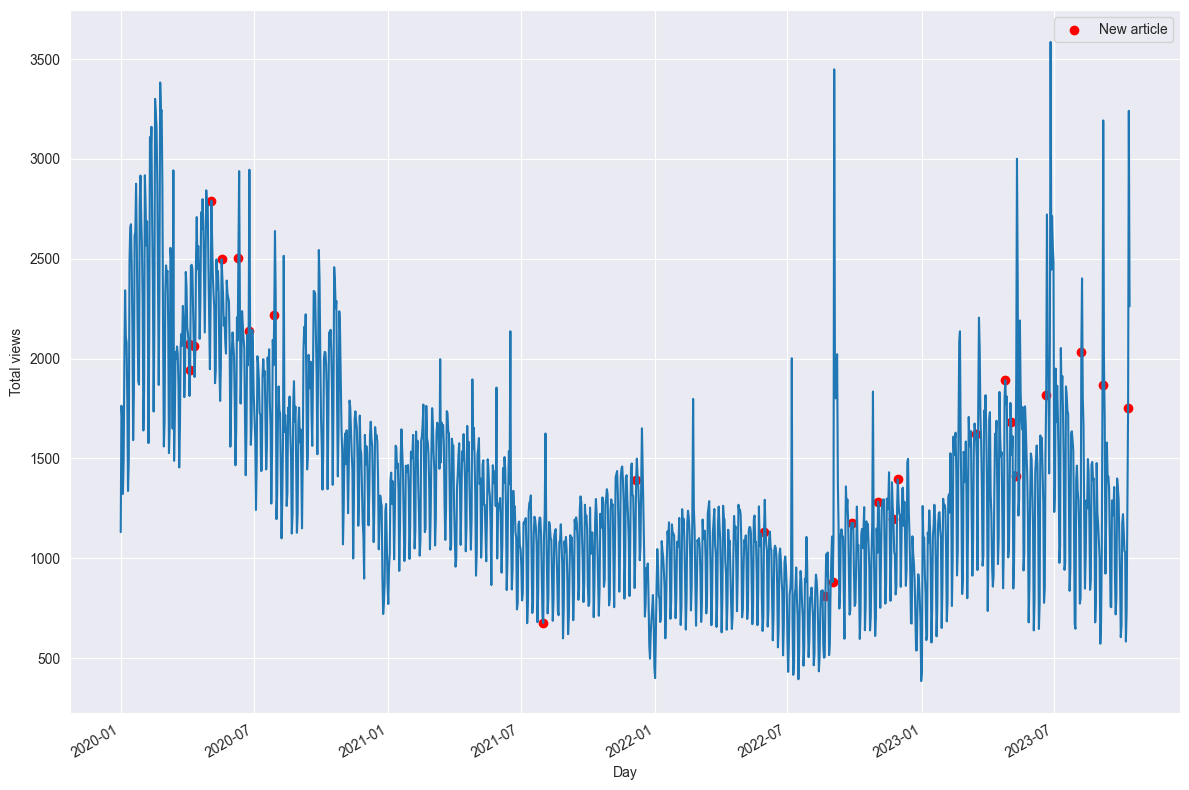

In [10]:
published_dates = df[df['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()


plt.tight_layout()

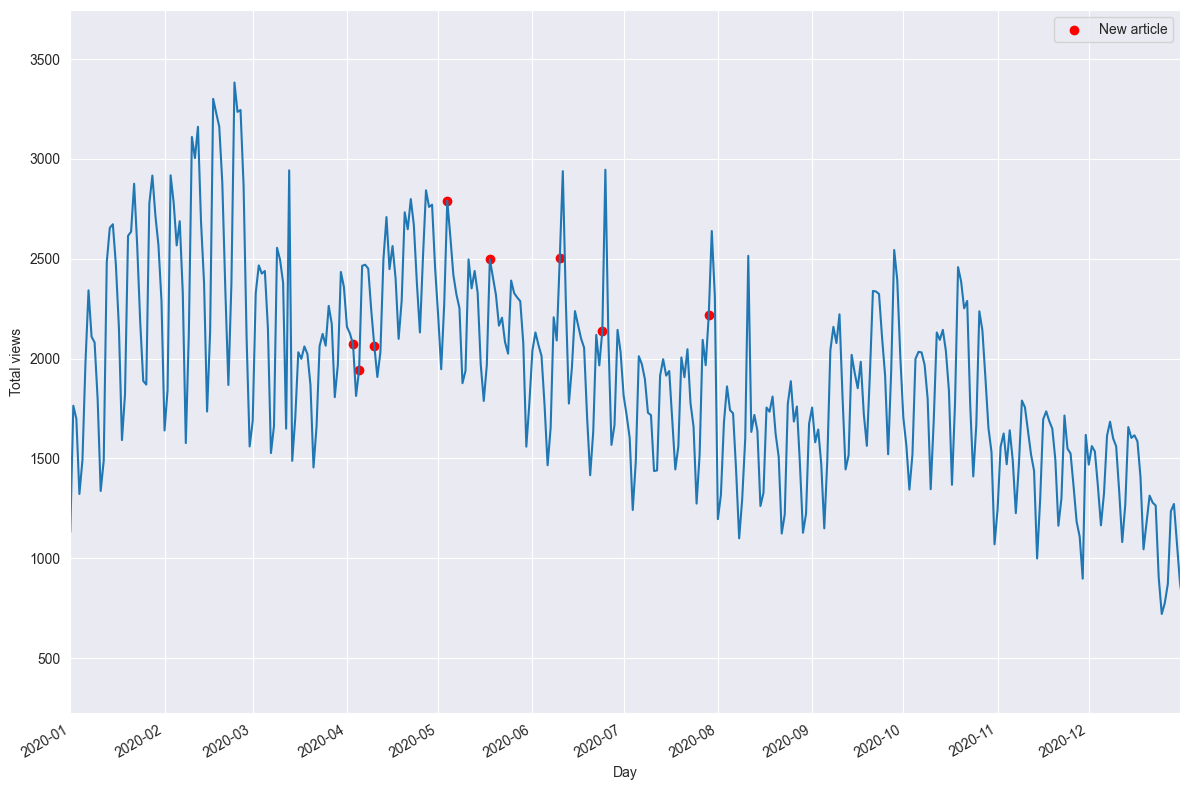

In [11]:
published_dates = df[df['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.autofmt_xdate()


plt.tight_layout()

In [13]:
train = df[:-168]
test = df[-168:]

print(train.shape)
print(test.shape)

(1213, 5)
(168, 5)


In [ ]:
df.iloc[:1213]

In [ ]:
# TimeGPT
future_exog = test[['unique_id', 'ds', 'published', 'is_holiday']]

timegpt = TimeGPT(token=API_KEY)

timegpt_preds = []

for i in range(0, 162, 7):

    timegpt_preds_df = timegpt.forecast(
        df=df.iloc[:1213+i],
        X_df = future_exog[i:i+7],
        h=7,
        finetune_steps=10,
        id_col='unique_id',
        time_col='ds',
        target_col='y'
    )
    
    preds = timegpt_preds_df['TimeGPT']
    
    timegpt_preds.extend(preds)

In [ ]:
# TimeGPT
test['TimeGPT'] = timegpt_preds
test.head()

In [ ]:
#Forecasting with N-BEATS, N-HiTS and PatchTST

In [15]:
horizon = 7

models = [NHITS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=5*horizon,
                 max_steps=50)]

Seed set to 1
Seed set to 1
Seed set to 1


In [16]:
nf = NeuralForecast(models=models, freq='D')

In [19]:
future_exog = test[['unique_id', 'published', 'is_holiday']]

preds_df = nf.cross_validation(df=df, static_df=future_exog , step_size=7, n_windows=24)

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

In [ ]:
# TimeGPT
preds_df['TimeGPT'] = test['TimeGPT']

In [20]:
test.to_csv('medium_views_test.csv', header=True, index=False)

In [ ]:
#TimeGPT
published_dates = test[test['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(test['ds'], test['y'])
ax.plot(test['ds'], test['TimeGPT'], label='TimeGPT')

ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')

ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [22]:
preds_df.sample(3)

,unique_id,ds,cutoff,NHITS,NBEATS,PatchTST,y,published,is_holiday
166,0,2023-10-11,2023-10-05,1139.4,1231.9,1072.8,3241,0.0,0
9,0,2023-05-07,2023-05-04,1072.7,1033.9,1066.0,979,0.0,0
19,0,2023-05-17,2023-05-11,2883.0,2332.1,2185.4,1709,0.0,0


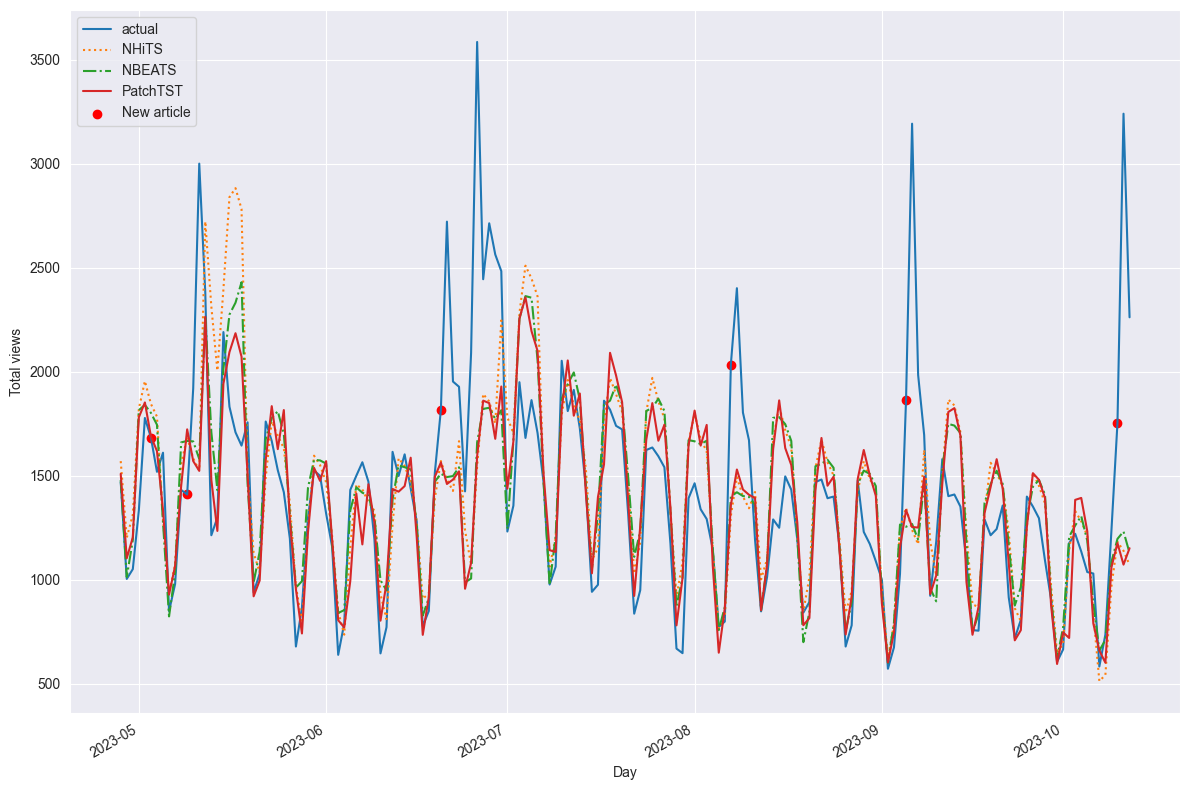

In [23]:
published_dates = test[test['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(preds_df['ds'], preds_df['y'], label='actual')
#ax.plot(preds_df['ds'], preds_df['TimeGPT'], ls='--', label='TimeGPT')
ax.plot(preds_df['ds'], preds_df['NHITS'], ls=':', label='NHiTS')
ax.plot(preds_df['ds'], preds_df['NBEATS'], ls='-.', label='NBEATS')
ax.plot(preds_df['ds'], preds_df['PatchTST'], ls='-', label='PatchTST')

ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')

ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [24]:
preds_df = preds_df.round({
    'NHITS': 0,
    'NBEATS': 0,
    'PatchTST': 0,
    'TimeGPT': 0
})

preds_df.head()

,unique_id,ds,cutoff,NHITS,NBEATS,PatchTST,y,published,is_holiday
0,0,2023-04-28,2023-04-27,1570.0,1480.0,1509.0,1470,0.0,0
1,0,2023-04-29,2023-04-27,1202.0,1013.0,1103.0,1004,0.0,0
2,0,2023-04-30,2023-04-27,1313.0,1191.0,1204.0,1051,0.0,0
3,0,2023-05-01,2023-04-27,1822.0,1816.0,1781.0,1333,0.0,0
4,0,2023-05-02,2023-04-27,1955.0,1841.0,1853.0,1778,0.0,0


In [26]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'PatchTST': [mae(preds_df['PatchTST'], preds_df['y']), mse(preds_df['PatchTST'], preds_df['y'])],
       #'TimeGPT': [mae(preds_df['TimeGPT'], preds_df['y']), mse(preds_df['TimeGPT'], preds_df['y'])]
       }

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,PatchTST
mae,299.345238,266.494048,266.928571
mse,218636.488095,182572.172619,184538.750000
